# 1.データの準備

In [14]:
# 必要なモジュールをインポート
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import load_boston
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
# ボストンの住宅価格サンプルデータのロード
boston = load_boston()

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [22]:
# 扱いやすいようにデータフレームを作成する
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [23]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [24]:
#目的変数（価格）を格納
boston_df['Price'] = boston.target

In [25]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# 2.データの可視化

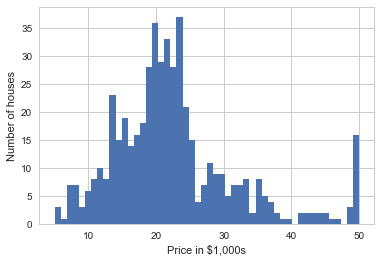

In [12]:
# 住宅の価格と、住宅数を表示
plt.hist(boston.target,bins=50)
plt.xlabel('Price in $1,000s')
plt.ylabel('Number of houses')

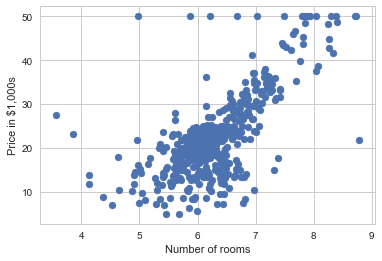

In [13]:
# 部屋の数と価格の関係
plt.scatter(boston.data[:,5],boston.target) #5番目が部屋数
plt.ylabel('Price in $1,000s')
plt.xlabel('Number of rooms')

# 3.学習

In [26]:
# 線形回帰クラスのインスタンス作成
lreg = LinearRegression()

##### LinearRegression()の使い方
lreg.fit() はデータを元にモデルを作る<br>
lreg.predict() は作られたモデルを元に、予測値を返す<br>
lreg.score()は、決定係数を返す<br>
(決定係数は、説明変数でどれくらいうまく目的変数の値を説明出来ているかの指標)

In [27]:
# 説明変数
X = boston_df.drop('Price',1)
# 目的変数
Y = boston_df.Price

In [28]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [31]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [35]:
# 学習用データとテスト用データに分離
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y)

In [36]:
# 学習
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# 求められた係数を確認
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.068726
1,ZN,0.041988
2,INDUS,-0.005983
3,CHAS,2.239213
4,NOX,-15.389507
5,RM,3.502166
6,AGE,-0.000627
7,DIS,-1.311031
8,RAD,0.294646
9,TAX,-0.012305


In [40]:
# 価格の予測
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [41]:
pred_test

array([ 19.16660901,  27.19170909,  18.16990829,  12.93126891,
        27.56106248,  19.81175902,  14.73688431,  30.48954282,
        25.80264188,  24.92385176,  19.7847584 ,  16.77545051,
        27.46510211,  23.07289161,  16.77033089,  26.69474108,
        21.55843718,  22.23872756,  22.02599018,  16.88685684,
        20.57297047,  15.62805555,  25.32128729,  20.04398523,
        20.6059199 ,  36.84249456,  15.531325  ,  31.32569757,
        24.70552991,  20.05457821,   4.79831178,  24.60155224,
        21.24345299,  23.63189878,  18.06831525,  21.74468939,
        18.37611615,  42.88607693,  16.59371214,  22.8140243 ,
        23.8598096 ,  26.2349369 ,  26.58098315,  19.48788629,
        26.68038713,  19.87224994,  20.21842903,  19.43805184,
        35.70711201,  12.17364075,  25.49838622,  21.20032178,
        24.19804541,  19.0444605 ,  30.39298506,  22.42787473,
        33.0155883 ,   2.68402713,  16.08812223,  18.5896269 ,
        36.53726599,  10.62076214,  23.61910776,  19.72

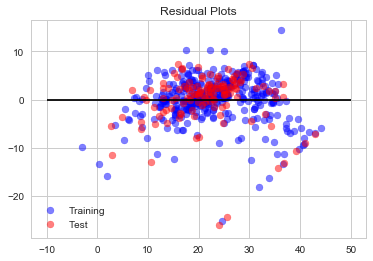

In [46]:
# 残差プロットで確認
# 残差・・・予測値と実際の値の差分
# 残差プロット・・・横軸に予測値、縦軸に実際の値との差をプロット

# 学習用のデータの残差プロット
train = plt.scatter(pred_train
                    ,(pred_train-Y_train)
                    ,c='b',alpha=0.5)
# テスト用のデータの残差プロット
test = plt.scatter(pred_test
                   ,(pred_test-Y_test)
                   ,c='r',alpha=0.5)
# y=0の水平な線
plt.hlines(y=0,xmin=-10,xmax=50)
# 凡例とタイトル
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')